# Final. Korean to English Translation

- Implement Korean to English translator using (Packed) Encoder-decoder, Convolution and Transformers.
  - Checking PPL, BLEU score.
  - Try to translate `unk` word using romanizer [link](https://github.com/osori/korean-romanizer).
- Reference site [link](https://github.com/bentrevett/pytorch-seq2seq)

## Data 
- `ko-en-en.parse.syn` Englinsh version of parsed file with POS 
```
(ROOT (S (NP (NNP Flight) (NNP 007)) (VP (MD will) (VP (VB stay) (PP (IN on) (NP (NP (DT the) (NN ground)) (PP (IN for) (NP (CD one) (NN hour))))))) (. .)))
```
- `ko-en-ko.parse.syn` Corresponding Korean version file woth POS and morpheme.
```
</id 1>
</sent 1>
1       2       NP      777/SN
2       6       NP_SBJ  항공편/NNG|은/JX
3       4       NP      1/SN|시간/NNG
4       6       NP_AJT  동안/NNG
5       6       NP_AJT  지상/NNG|에/JKB
6       7       VP      머물/VV|게/EC
7       0       VP      되/VV|ㅂ니다/EF|./SF
</sent>
</id>
```
- total 330,974
- Processing two files to Korean-Enlish parallel data and using it as train & validation set.
- Import nltk module to use parsed data.

# Summary

## 1. Data Preprocessing
- Extract contents only.
- Divide by 8:1:1 as train, valid, test set.
- Process them as a csv format and apply Torchtext module.

In [9]:
print(f"Number of Total examples: {len(train_data.examples)+len(valid_data.examples)+len(test_data.examples)}")
print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of Total examples: 330974
Number of training examples: 265109
Number of validation examples: 32767
Number of testing examples: 33098


## 2. Tokenizer
- Since it was a tokenizer sentence, only space was used.

## 3. Vocab
- Insert words that appear more than once.

In [209]:
print(f"Unique tokens in source (ko) vocabulary: {len(SRC.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TRG.vocab)}")

Unique tokens in source (ko) vocabulary: 16263
Unique tokens in target (en) vocabulary: 16059


## 3. Model
### Transformers 

|Model|Best Val. Loss|Val. PPL |Test Loss|Test PPL|BLEU Score|
|------------------------|----|----|----|----|----|
|(Packed) Encoder-Decoder|2.26|9.57|2.26|9.60|46.75|
|Convolutional Seq to Seq|1.50|4.48|2.31|10.12|37.09|
|Transformers|0.88|2.41|<span style="color:blue">0.88</span>|<span style="color:blue">2.42</span>|<span style="color:blue">55.86</span>|

### Result of Hyperparmeters Tuning

|Batch size|Learning Rate|Drop Out| ENC/DEC Layers|Best Val. Loss|Val. PPL |Test Loss|Test PPL|BLEU Score|Note|
|----------|-------------|--------|---------------|--------------|---------|---------|--------|----------|----|
|128|0.0005|0.1|3|0.94|2.57|0.95|2.58|51.20|Batch Size 비교|
|256|0.0005|0.1|3|0.91|2.49|0.92|2.50|-|
|64|0.0005|0.1|3|0.95|2.57|0.95|2.59|-|
|----------|-------------|--------|---------------|--------------|---------|---------|--------|----------|----|
|256|0.0001|0.1|3|1.08|2.93|1.07|2.93|-|Learning Rate 비교|
|256|0.0005|0.1|3|0.91|2.49|0.92|2.50|-|
|256|0.0008|0.1|3|0.97|2.63|0.97|2.64|-|
|256|0.0010|0.1|3|0.95|2.58|0.95|2.58|-|
|256|0.00001|0.1|3|2.10|8.19|2.10|8.18|-|
|----------|-------------|--------|---------------|--------------|---------|---------|--------|----------|----|
|256|0.0005|0.1|3|0.91|2.49|0.92|2.50|-|Drop Out 비교|
|256|0.0005|0.5|3|0.92|2.50|0.92|2.51|-||
|256|0.0005|0.7|3|0.92|2.52|0.93|2.52|-||
|----------|-------------|--------|---------------|--------------|---------|---------|--------|----------|----|
|256|0.0005|0.1|3|0.91|2.49|0.92|2.50|-|Epoch 10|
|<span style="color:blue">256</span>|0.0005|0.1|3|0.88|2.41|<span style="color:blue">0.88</span>|<span style="color:blue">2.42</span>|<span style="color:blue">55.86</span>|Epoch 20|

##  4. Result of Inference

### Compare senteces

|Model|Sentence|
|------|----------------------------------------------------------------------------|
|-|그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?|
|(Packed) Encoder-Decoder|that size for the invoice for me . i think you can . how you you for this for the '\<'unk'\>' for the '\<'unk'\>' ?|
|Convolutional|how much is it in a little ?|
    |<span style="color:blue">Transformers</span>|<span style="color:blue">show me that pants are looking at all . how much can i buy this one ?</span>|

### (Packed) Encoder-Decoder

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","all liquids , gels aerosols aerosols , gels , aerosols in the , , and aerosols in the upper container . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?","i 'm sorry , <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> . <unk> . <unk> . <unk> . <unk> . wo n't you take a <unk> <unk> . <eos>"
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,it 's why not a a big reason . wo n't you have to pay it <unk> . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,i have n't leak out the <unk> <unk> <unk> . <unk> <unk> . <unk> . <unk> . . . <eos>
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,the <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> . <eos>
5,변기 가 막히 었 습니다 .,the <unk> <unk> the the city i was n't . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,that size for the invoice for me . i think you can . how you you for this for the <unk> for the <unk> ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,it was the to the the <unk> journey was <unk> and <unk> journey was <unk> and <unk> . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,it is <unk> from the <unk> <unk> <unk> <unk> after <unk> and <unk> after the <unk> . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,the athletic always is the the <unk> and <unk> <unk> and <unk> . <eos>


### Convolutional

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","i 'm a bag , gels , gels , gels , gels , gels , and liquids . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?","can you give me a <unk> for the <unk> to <unk> , but i 'm afraid i 'm going to get a <unk> to go to <unk> , but i 'm going to get a <unk> for the <unk> to <unk> to get a <unk> , but i 'm going"
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,i need money . the <unk> is not too good . the bank is not too far to get a full . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,are you going to have to have to have to have to have to have to have a form . <eos>
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,<unk> <unk> <unk> <unk> to <unk> <unk> to <unk> <unk> to <unk> <unk> to <unk> <unk> from <unk> <unk> from <unk> <unk> . <eos>
5,변기 가 막히 었 습니다 .,it 's a traffic jam . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,how much is it in a little ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,i 'd like to have a department store . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,i do n't feel good to be a good time to go in the morning . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,i 'm afraid the profit is <unk> from the <unk> . <eos>


### Transformers 

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","all liquids , gels and aerosols must be placed in a single , zip-top , clear plastic bag . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?",excuse me . my child is laundered clothes because my children 's collection library . do n't you have credit ? <eos>
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,i 'm afraid it 's too far behind in the bank . you need cash payment in cash advance . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,"we may have lost the baggage , so we 'd like to make a lost baggage report . would you come with me to the office ? <eos>"
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,"<unk> governor <unk> , <unk> and i will be promoted to daegu <unk> between electric 2000 . <eos>"
5,변기 가 막히 었 습니다 .,the toilet is stopped up . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,show me that pants are looking at all . how much can i buy this one ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,i 'd like to go to the duta and take care of the department store . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,i ca n't wash my hands when i feel bad . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,the president told me to build a group 's <unk> . <eos>


## 4. Further Study
### Romanizer
1) To process `<unk>`, replace Korean to Roman.
2) Except word that not included in Roman

**Compare Results**

|Type|Sentence|
|------|----------------------------------------------------------------------------|
|-|통합 우승 의 목표 를 달성하 ㄴ NC 다이노스 나성범 이 메이저리그 진출 이라는 또 다른 꿈 을 향하 어 나아가 ㄴ다 .|
|기존|they '\<'unk'\>' the grass '\<'unk'\>' , which changes to '\<'unk'\>' the other '\<'unk'\>' '\<'unk'\>' '\<'unk'\>' '\<'unk'\>' '\<'unk'\>' 's recent miles .|
|Romanize|they <span style="color:blue">useung</span> the grass <span style="color:blue">reul</span> , which changes to <span style="color:blue">naseongbeom</span> the other <span style="color:blue">jinchul iraneun tto dareun kkum</span> 's recent miles .|


In [51]:
# Before

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","all liquids , gels and aerosols must be placed in a single , zip-top , clear plastic bag . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?",excuse me . my child is laundered clothes because my children 's collection library . do n't you have credit ? <eos>
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,i 'm afraid it 's too far behind in the bank . you need cash payment in cash advance . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,"we may have lost the baggage , so we 'd like to make a lost baggage report . would you come with me to the office ? <eos>"
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,"<unk> governor <unk> , <unk> and i will be promoted to daegu <unk> between electric 2000 . <eos>"
5,변기 가 막히 었 습니다 .,the toilet is stopped up . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,show me that pants are looking at all . how much can i buy this one ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,i 'd like to go to the duta and take care of the department store . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,i ca n't wash my hands when i feel bad . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,the president told me to build a group 's <unk> . <eos>


In [ ]:
# After 

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","all liquids , gels and aerosols must be placed in a single , zip-top , clear plastic bag . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?",excuse me . my child is laundered clothes because my children 's collection library . do n't you have credit ? <eos>
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,i 'm afraid it 's too far behind in the bank . you need cash payment in cash advance . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,"we may have lost the baggage , so we 'd like to make a lost baggage report . would you come with me to the office ? <eos>"
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,"busan governor korona , ga and i will be promoted to daegu jija between electric 2000 . <eos>"
5,변기 가 막히 었 습니다 .,the toilet is stopped up . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,show me that pants are looking at all . how much can i buy this one ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,i 'd like to go to the duta and take care of the department store . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,i ca n't wash my hands when i feel bad . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,the president told me to build a group 's rago . <eos>


### Replace Korean as reverse order.
- It has no difference.
    
**Compare Results**

|Model|Best Val. Loss|Val. PPL |Test Loss|Test PPL|BLEU Score|
|------------------------|----|----|----|----|----|
|Forward|0.87|2.40|0.88|2.42|55.86|	
|Backward|0.88|2.41|0.88|2.41|55.72|	


|Type|Sentence|
|------|----------------------------------------------------------------------------|
|-|그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?|
|Forward|show me that pants are looking at all . how much can i buy this one ?|
|Backward|how much can i buy ? i see these one .|


In [94]:
# backward

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","i need a single bag , please . all liquids , gels and aerosols in their carry-on bag . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?",could you change my ticket to gwanghwamun ? my child 's scared to me . <eos>
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,you need to get paid . it 's too much of a bank to get back . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,shall we go along with you ? we have lost your baggage . we must make a missing suitcase form . <eos>
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,"<unk> <unk> in daegu , <unk> are really passing through at busan . <eos>"
5,변기 가 막히 었 습니다 .,the toilet is clogged up . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,how much can i buy ? i see these one . <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,"that 's good . if you go to duta , you can take it to the department store . <eos>"
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,it 's good to be polite with breakfast in the morning . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,i told you all doors in the same group . <eos>


---

# Code

# 1. File Processing

In [4]:
from nltk import Tree

enen_list_raw = [] # parse file
enen_list = []

i = 0
with open('ko-en.en.parse.syn', 'r') as f:
    for j in f.readlines():
        temp = ' '.join(Tree.fromstring(j).leaves())
        enen_list.append(temp)

In [5]:
enko_list = []
with open('ko-en.ko.parse', 'r') as f:

    line = []
    for j in f.readlines():
        if ('<id' in j) or ('<sent' in j) or ('</sent' in j):
            continue
        if '</id>' in j:
            continue
        if j == '\n':
            line = ' '.join(line)
            enko_list.append(line)
            line = []
            continue        
        
        split_tab=j.split('\t')
        text=split_tab[3].split('/')    # get text
        line.append(text[0])            # save

        for temp_text in text[1:]:
            if len(temp_text)==0:
                continue
            if '\n' in temp_text:
                break;
                
            text_2 = temp_text.split('|')
            line.append(text_2[1])         # save

In [6]:
import pandas as pd

raw_data = {'Korean' : enko_list, 'English': enen_list}
df = pd.DataFrame(raw_data, columns=["Korean", "English"])

df.to_csv("data.csv",index=False)

df

,Korean,English
0,777 항공편 은 1 시간 동안 지상 에 머물 게 되 ㅂ니다 .,Flight 007 will stay on the ground for one hour .
1,777 항공편 은 3 시간 동안 지상 에 있 겠 습니다 .,Flight 017 will stay on the ground for three h...
2,"1 , 000 달러 여행자 수표 가 필요 하 ㅂ니다 .","I need 1,000 dollars in traveler 's checks ."
3,"1 , 250 원 이 공식 환율 이 ㅂ니다 .","The official exchange rate is around 1,250 Won ."
4,100 달러 3 장 과 나머지 는 20 달러 권 으로 주 시 ㅂ시오 .,Please give me three hundred dollar bills and ...
...,...,...
330969,"저 의 주소 가 지방 으로 되 어 있 는데 , 서울 에서 여권 을 만들 ㄹ 수 있 ...",Can I file my passport application in Seoul ev...
330970,학교 친구 한 명 이 LA 에 있 어요 .,I have a school friend in Los Angeles .
330971,이것 ㄴ 얼마 이 에요 ?,How much is this ?
330972,저것 ㄴ 얼마 이 에요 ?,How much is that ?


In [21]:
# Specify input format using TorchText Field.
def tokenize_ko(text):
    return [tok for tok in text.split()]

def tokenize_en(text):
    return [tok for tok in text.split()]

In [22]:
# init_token and eos_token append <sos>, <eos> automatically.
SRC = Field(tokenize = tokenize_ko,
           init_token = '<sos>',
           eos_token = '<eos>',
           )

TRG = Field(tokenize = tokenize_en,
            init_token = '<sos>',
            eos_token = '<eos>',
           )

In [23]:
data_fields = {'Korean': ('src',SRC), 'English': ('trg',TRG)}
data_set = TabularDataset('data.csv',
                          format='csv',fields=data_fields)

In [24]:
train_data, test_data = data_set.split(split_ratio=0.8,random_state=random.seed(SEED))
test_data, valid_data = test_data.split(split_ratio=0.5,random_state=random.seed(SEED))

In [14]:
vars(train_data[1])

{'src': ['전화번호부에서', '찾아보시어요', '.'],
 'trg': ['look', 'it', 'up', 'in', 'the', 'yellow', 'pages', '.']}

#### Check ratio train : valid : test = 8 : 1 : 1

In [15]:
print(f"Number of Total examples: {len(train_data.examples)+len(valid_data.examples)+len(test_data.examples)}")

print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of Total examples: 330974
Number of training examples: 265109
Number of validation examples: 32767
Number of testing examples: 33098


In [16]:
# Create vocab. Use only words that appear more than once.
SRC.build_vocab(train_data, min_freq = 2)
TRG.build_vocab(train_data, min_freq = 2)

## import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchtext
from torchtext.data import Field, BucketIterator, TabularDataset

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

import random
import math
import time

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# 2. (Packed) Encoder-Decoder

- Create Iterator.
- Using BucketIterator minimizes padding by making the sentence length of the input/output array as close as possible.

In [17]:
# make iterator
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
     batch_size = BATCH_SIZE,
     sort_within_batch = True,
     sort_key = lambda x : len(x.src),
     device = device)

In [18]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, emb_dim)
        
        self.rnn = nn.GRU(emb_dim, enc_hid_dim, bidirectional = True)
        
        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_len):
        
        embedded = self.dropout(self.embedding(src))
        
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, src_len)
                
        packed_outputs, hidden = self.rnn(packed_embedded)
                                 
        outputs, _ = nn.utils.rnn.pad_packed_sequence(packed_outputs) 
            
        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)))
        
        return outputs, hidden

In [19]:
class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        
        self.attn = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim, 1, bias = False)
        
    def forward(self, hidden, encoder_outputs, mask):
        
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]
        
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
  
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim = 2))) 
        
        attention = self.v(energy).squeeze(2)
        
        attention = attention.masked_fill(mask == 0, -1e10)
        
        return F.softmax(attention, dim = 1)

In [20]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout, attention):
        super().__init__()

        self.output_dim = output_dim
        self.attention = attention
        
        self.embedding = nn.Embedding(output_dim, emb_dim)
        
        self.rnn = nn.GRU((enc_hid_dim * 2) + emb_dim, dec_hid_dim)
        
        self.fc_out = nn.Linear((enc_hid_dim * 2) + dec_hid_dim + emb_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, encoder_outputs, mask):
             
        input = input.unsqueeze(0)
        
        embedded = self.dropout(self.embedding(input))
        
        a = self.attention(hidden, encoder_outputs, mask)
                
        a = a.unsqueeze(1)
        
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        weighted = torch.bmm(a, encoder_outputs)
        
        weighted = weighted.permute(1, 0, 2)
        
        rnn_input = torch.cat((embedded, weighted), dim = 2)
        
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        
        assert (output == hidden).all()
        
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)
        
        prediction = self.fc_out(torch.cat((output, weighted, embedded), dim = 1))
        
        return prediction, hidden.squeeze(0), a.squeeze(1)

In [21]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.device = device
        
    def create_mask(self, src):
        mask = (src != self.src_pad_idx).permute(1, 0)
        return mask
        
    def forward(self, src, src_len, trg, teacher_forcing_ratio = 0.5):

        batch_size = src.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        encoder_outputs, hidden = self.encoder(src, src_len)
                
        input = trg[0,:]
        
        mask = self.create_mask(src)

                
        for t in range(1, trg_len):
            
            output, hidden, _ = self.decoder(input, hidden, encoder_outputs, mask)
            
            outputs[t] = output
            
            teacher_force = random.random() < teacher_forcing_ratio
            
            top1 = output.argmax(1) 
            
            input = trg[t] if teacher_force else top1
            
        return outputs

In [22]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
ENC_HID_DIM = 512
DEC_HID_DIM = 512
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5
SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]

attn = Attention(ENC_HID_DIM, DEC_HID_DIM)
enc = Encoder(INPUT_DIM, ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, DEC_DROPOUT, attn)

model = Seq2Seq(enc, dec, SRC_PAD_IDX, device).to(device)

In [23]:
def init_weights(m):
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)
            
model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(55932, 256)
    (rnn): GRU(256, 512, bidirectional=True)
    (fc): Linear(in_features=1024, out_features=512, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (attention): Attention(
      (attn): Linear(in_features=1536, out_features=512, bias=True)
      (v): Linear(in_features=512, out_features=1, bias=False)
    )
    (embedding): Embedding(14343, 256)
    (rnn): GRU(1280, 512)
    (fc_out): Linear(in_features=1792, out_features=14343, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [24]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 50,140,679 trainable parameters


In [25]:
optimizer = optim.Adam(model.parameters())

In [26]:
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [27]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        src, src_len = batch.src
        trg = batch.trg
        optimizer.zero_grad()
        
        output = model(src, src_len, trg)
        
        output_dim = output.shape[-1]
        
        output = output[1:].view(-1, output_dim)
        trg = trg[1:].view(-1)
        
        loss = criterion(output, trg)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

In [28]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src, src_len = batch.src
            trg = batch.trg

            output = model(src, src_len, trg, 0) #turn off teacher forcing
            
            output_dim = output.shape[-1]
            
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)

            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [29]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [30]:
N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut4-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

Epoch: 01 | Time: 4m 50s
	Train Loss: 3.489 | Train PPL:  32.768
	 Val. Loss: 3.153 |  Val. PPL:  23.418
Epoch: 02 | Time: 4m 49s
	Train Loss: 2.279 | Train PPL:   9.771
	 Val. Loss: 2.726 |  Val. PPL:  15.271
Epoch: 03 | Time: 4m 48s
	Train Loss: 1.841 | Train PPL:   6.302
	 Val. Loss: 2.558 |  Val. PPL:  12.907
Epoch: 04 | Time: 4m 48s
	Train Loss: 1.594 | Train PPL:   4.923
	 Val. Loss: 2.473 |  Val. PPL:  11.858
Epoch: 05 | Time: 4m 48s
	Train Loss: 1.423 | Train PPL:   4.151
	 Val. Loss: 2.381 |  Val. PPL:  10.815
Epoch: 06 | Time: 5m 16s
	Train Loss: 1.315 | Train PPL:   3.725
	 Val. Loss: 2.361 |  Val. PPL:  10.602
Epoch: 07 | Time: 4m 49s
	Train Loss: 1.229 | Train PPL:   3.419
	 Val. Loss: 2.310 |  Val. PPL:  10.071
Epoch: 08 | Time: 5m 13s
	Train Loss: 1.161 | Train PPL:   3.194
	 Val. Loss: 2.313 |  Val. PPL:  10.102
Epoch: 09 | Time: 5m 18s
	Train Loss: 1.118 | Train PPL:   3.060
	 Val. Loss: 2.259 |  Val. PPL:   9.573
Epoch: 10 | Time: 4m 47s
	Train Loss: 1.072 | Train PPL

In [43]:
model.load_state_dict(torch.load('tut4-model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 2.262 | Test PPL:   9.600 |


In [44]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):

    model.eval()
        
    if isinstance(sentence, str):
        #nlp = spacy.load('de')
        tokens = [token for token in sentence.split()]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]
    
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(1).to(device)

    src_len = torch.LongTensor([len(src_indexes)]).to(device)
    
    with torch.no_grad():
        encoder_outputs, hidden = model.encoder(src_tensor, src_len)

    mask = model.create_mask(src_tensor)
        
    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    attentions = torch.zeros(max_len, 1, len(src_indexes)).to(device)
    
    for i in range(max_len):

        trg_tensor = torch.LongTensor([trg_indexes[-1]]).to(device)
                
        with torch.no_grad():
            output, hidden, attention = model.decoder(trg_tensor, hidden, encoder_outputs, mask)

        attentions[i] = attention
            
        pred_token = output.argmax(1).item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attentions[:len(trg_tokens)-1]

In [45]:
def display_attention(sentence, translation, attention):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    attention = attention.squeeze(1).cpu().detach().numpy()
    
    cax = ax.matshow(attention, cmap='bone')
   
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], 
                       rotation=45)
    ax.set_yticklabels(['']+translation)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

### bleu

In [46]:
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['src']
        trg = vars(datum)['trg']
        
        pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)

In [47]:
bleu_score = calculate_bleu(test_data, SRC, TRG, model, device)

print(f'BLEU score = {bleu_score*100:.2f}')

BLEU score = 46.75


In [48]:
sen_list = [
'모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .',
'미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?',
'은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요',
'아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?',
'부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자  확진자 20명 을 대구 로 이송하 ㄴ다 .',
'변기 가 막히 었 습니다 .',
'그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?',
'비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .',
'속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다',
'문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .',
'이것 좀 먹어 보 ㄹ 몇 일 간 의 시간 을 주 시 어요 .',
'이날 개미군단 은 외인 의 물량 을 모두 받 아 내 었 다 .',
'통합 우승 의 목표 를 달성하 ㄴ NC 다이노스 나성범 이 메이저리그 진출 이라는 또 다른 꿈 을 향하 어 나아가 ㄴ다 .',
'이번 구조 조정 이 제품 을 효과 적 으로 개발 하 고 판매 하 기 위하 ㄴ 회사 의 능력 강화 조처 이 ㅁ 을 이해 하 아 주 시 리라 생각 하 ㅂ니다 .',
'요즘 이 프로그램 녹화 하 며 많은 걸 느끼 ㄴ다 ']

In [49]:
import pandas as pd
df = pd.DataFrame()

for s in sen_list:
  translation, attention = translate_sentence(s, SRC, TRG, model, device)
  pred = ' '.join(translation)
  final = {'Korean': s, 'English': pred}
  df=df.append(final, ignore_index=True)


pd.set_option('max_colwidth', 200)
df = df[['Korean','English']]
df

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","all liquids , gels aerosols aerosols , gels , aerosols in the , , and aerosols in the upper container . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?","i 'm sorry , <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> . <unk> . <unk> . <unk> . <unk> . wo n't you take a <unk> <unk> . <eos>"
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,it 's why not a a big reason . wo n't you have to pay it <unk> . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,i have n't leak out the <unk> <unk> <unk> . <unk> <unk> . <unk> . <unk> . . . <eos>
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,the <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> . <eos>
5,변기 가 막히 었 습니다 .,the <unk> <unk> the the city i was n't . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,that size for the invoice for me . i think you can . how you you for this for the <unk> for the <unk> ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,it was the to the the <unk> journey was <unk> and <unk> journey was <unk> and <unk> . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,it is <unk> from the <unk> <unk> <unk> <unk> after <unk> and <unk> after the <unk> . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,the athletic always is the the <unk> and <unk> <unk> and <unk> . <eos>


# 3. Convolutional Sequence to Sequence

In [19]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
     batch_size = BATCH_SIZE,
     sort_within_batch = True,
     sort_key = lambda x : len(x.src),
     device = device)

# train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
#     (train_data, valid_data, test_data), 
#      batch_size = BATCH_SIZE,
#      device = device)

/usr/local/lib/python3.6/dist-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [20]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 emb_dim, 
                 hid_dim, 
                 n_layers, 
                 kernel_size, 
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()
        
        assert kernel_size % 2 == 1, "Kernel size must be odd!"
        
        self.device = device
        
        self.scale = torch.sqrt(torch.FloatTensor([0.5])).to(device)
        
        self.tok_embedding = nn.Embedding(input_dim, emb_dim)
        self.pos_embedding = nn.Embedding(max_length, emb_dim)
        
        self.emb2hid = nn.Linear(emb_dim, hid_dim)
        self.hid2emb = nn.Linear(hid_dim, emb_dim)
        
        self.convs = nn.ModuleList([nn.Conv1d(in_channels = hid_dim, 
                                              out_channels = 2 * hid_dim, 
                                              kernel_size = kernel_size, 
                                              padding = (kernel_size - 1) // 2)
                                    for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src):
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        tok_embedded = self.tok_embedding(src)
        pos_embedded = self.pos_embedding(pos)
        
        embedded = self.dropout(tok_embedded + pos_embedded)
        
        conv_input = self.emb2hid(embedded)
        
        conv_input = conv_input.permute(0, 2, 1) 
        
        
        for i, conv in enumerate(self.convs):
        
            conved = conv(self.dropout(conv_input))

            conved = F.glu(conved, dim = 1)

            conved = (conved + conv_input) * self.scale

            conv_input = conved
        
        conved = self.hid2emb(conved.permute(0, 2, 1))
        
        combined = (conved + embedded) * self.scale
        
        return conved, combined

In [21]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 emb_dim, 
                 hid_dim, 
                 n_layers, 
                 kernel_size, 
                 dropout, 
                 trg_pad_idx, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.kernel_size = kernel_size
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
        self.scale = torch.sqrt(torch.FloatTensor([0.5])).to(device)
        
        self.tok_embedding = nn.Embedding(output_dim, emb_dim)
        self.pos_embedding = nn.Embedding(max_length, emb_dim)
        
        self.emb2hid = nn.Linear(emb_dim, hid_dim)
        self.hid2emb = nn.Linear(hid_dim, emb_dim)
        
        self.attn_hid2emb = nn.Linear(hid_dim, emb_dim)
        self.attn_emb2hid = nn.Linear(emb_dim, hid_dim)
        
        self.fc_out = nn.Linear(emb_dim, output_dim)
        
        self.convs = nn.ModuleList([nn.Conv1d(in_channels = hid_dim, 
                                              out_channels = 2 * hid_dim, 
                                              kernel_size = kernel_size)
                                    for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
      
    def calculate_attention(self, embedded, conved, encoder_conved, encoder_combined):
        
        conved_emb = self.attn_hid2emb(conved.permute(0, 2, 1))
        
        combined = (conved_emb + embedded) * self.scale
        
        energy = torch.matmul(combined, encoder_conved.permute(0, 2, 1))
        
        attention = F.softmax(energy, dim=2)
        
        attended_encoding = torch.matmul(attention, encoder_combined)
        
        attended_encoding = self.attn_emb2hid(attended_encoding)
        
        attended_combined = (conved + attended_encoding.permute(0, 2, 1)) * self.scale
        
        return attention, attended_combined
        
    def forward(self, trg, encoder_conved, encoder_combined):
        
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
            
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        tok_embedded = self.tok_embedding(trg)
        pos_embedded = self.pos_embedding(pos)
        
        embedded = self.dropout(tok_embedded + pos_embedded)
        
        conv_input = self.emb2hid(embedded)
        
        conv_input = conv_input.permute(0, 2, 1) 
        
        batch_size = conv_input.shape[0]
        hid_dim = conv_input.shape[1]
        
        for i, conv in enumerate(self.convs):
        
            conv_input = self.dropout(conv_input)
        
            padding = torch.zeros(batch_size, 
                                  hid_dim, 
                                  self.kernel_size - 1).fill_(self.trg_pad_idx).to(self.device)
                
            padded_conv_input = torch.cat((padding, conv_input), dim = 2)
        
            conved = conv(padded_conv_input)

            conved = F.glu(conved, dim = 1)

            attention, conved = self.calculate_attention(embedded, 
                                                         conved, 
                                                         encoder_conved, 
                                                         encoder_combined)
            
            conved = (conved + conv_input) * self.scale
            
            conv_input = conved
            
        conved = self.hid2emb(conved.permute(0, 2, 1))
         
        output = self.fc_out(self.dropout(conved))
        
        return output, attention

In [22]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, src, trg):
        
        encoder_conved, encoder_combined = self.encoder(src)
            
        output, attention = self.decoder(trg, encoder_conved, encoder_combined)
        
        return output, attention

#### Training the Seq2Seq Model

In [23]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
EMB_DIM = 256
HID_DIM = 512 # each conv. layer has 2 * hid_dim filters
ENC_LAYERS = 10 # number of conv. blocks in encoder
DEC_LAYERS = 10 # number of conv. blocks in decoder
ENC_KERNEL_SIZE = 3 # must be odd!
DEC_KERNEL_SIZE = 3 # can be even or odd
ENC_DROPOUT = 0.25
DEC_DROPOUT = 0.25
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]
    
enc = Encoder(INPUT_DIM, EMB_DIM, HID_DIM, ENC_LAYERS, ENC_KERNEL_SIZE, ENC_DROPOUT, device)
dec = Decoder(OUTPUT_DIM, EMB_DIM, HID_DIM, DEC_LAYERS, DEC_KERNEL_SIZE, DEC_DROPOUT, TRG_PAD_IDX, device)

model = Seq2Seq(enc, dec).to(device)

In [24]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 43,838,471 trainable parameters


In [25]:
optimizer = optim.Adam(model.parameters())

In [26]:
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [27]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        
        src = batch.src
        trg = batch.trg
        
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
        
        output_dim = output.shape[-1]
        
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
        
        loss = criterion(output, trg)
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [28]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output, _ = model(src, trg[:,:-1])
        
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)

            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [29]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [30]:
N_EPOCHS = 6
CLIP = 0.1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

/usr/local/lib/python3.6/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch: 01 | Time: 5m 42s
	Train Loss: 3.242 | Train PPL:  25.583
	 Val. Loss: 2.096 |  Val. PPL:   8.136
Epoch: 02 | Time: 5m 46s
	Train Loss: 2.248 | Train PPL:   9.469
	 Val. Loss: 1.763 |  Val. PPL:   5.830
Epoch: 03 | Time: 5m 47s
	Train Loss: 1.979 | Train PPL:   7.238
	 Val. Loss: 1.613 |  Val. PPL:   5.018
Epoch: 04 | Time: 5m 46s
	Train Loss: 1.805 | Train PPL:   6.082
	 Val. Loss: 1.500 |  Val. PPL:   4.480
Epoch: 05 | Time: 5m 46s
	Train Loss: 1.937 | Train PPL:   6.939
	 Val. Loss: 1.603 |  Val. PPL:   4.968
Epoch: 06 | Time: 5m 46s
	Train Loss: 2.613 | Train PPL:  13.644
	 Val. Loss: 2.275 |  Val. PPL:   9.730


In [31]:
#model.load_state_dict(torch.load('tut5-model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

/usr/local/lib/python3.6/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


| Test Loss: 2.314 | Test PPL:  10.120 |


#### Inference

In [32]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):

    model.eval()
        
    if isinstance(sentence, str):
        # nlp = spacy.load('de')
        # tokens = [token.text.lower() for token in nlp(sentence)]
        tokens = [token for token in sentence.split()]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)

    with torch.no_grad():
        encoder_conved, encoder_combined = model.encoder(src_tensor)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, encoder_conved, encoder_combined)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attention

In [34]:
def display_attention(sentence, translation, attention):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
        
    attention = attention.squeeze(0).cpu().detach().numpy()
    
    cax = ax.matshow(attention, cmap='bone')
   
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], 
                       rotation=45)
    ax.set_yticklabels(['']+translation)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

In [38]:
example_idx = 2

src = vars(valid_data.examples[example_idx])['src']
trg = vars(valid_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['?', '나요', '가', '게', '어떻', '에', '유적지', '암사동']
trg = ['how', 'can', 'i', 'get', 'to', 'amsadongyujeokji', '?']


In [39]:
translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg = {translation}')

predicted trg = ['how', 'can', 'i', 'get', 'to', 'amsadongyujeokji', '?', '<eos>']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46523 missing from current font.
  font.set_

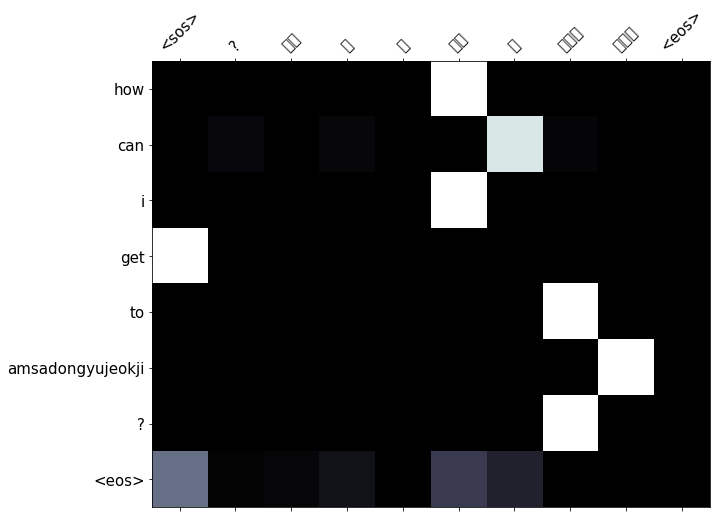

In [40]:
display_attention(src, translation, attention)

#### BLEU

In [44]:
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['src']
        trg = vars(datum)['trg']
        
        pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)

In [45]:
bleu_score = calculate_bleu(test_data, SRC, TRG, model, device)

print(f'BLEU score = {bleu_score*100:.2f}')

BLEU score = 37.09


In [47]:
sen_list = [
'모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .',
'미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?',
'은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요',
'아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?',
'부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자  확진자 20명 을 대구 로 이송하 ㄴ다 .',
'변기 가 막히 었 습니다 .',
'그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?',
'비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .',
'속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다',
'문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .',
'이것 좀 먹어 보 ㄹ 몇 일 간 의 시간 을 주 시 어요 .',
'이날 개미군단 은 외인 의 물량 을 모두 받 아 내 었 다 .',
'통합 우승 의 목표 를 달성하 ㄴ NC 다이노스 나성범 이 메이저리그 진출 이라는 또 다른 꿈 을 향하 어 나아가 ㄴ다 .',
'이번 구조 조정 이 제품 을 효과 적 으로 개발 하 고 판매 하 기 위하 ㄴ 회사 의 능력 강화 조처 이 ㅁ 을 이해 하 아 주 시 리라 생각 하 ㅂ니다 .',
'요즘 이 프로그램 녹화 하 며 많은 걸 느끼 ㄴ다 ']

In [48]:
import pandas as pd
df = pd.DataFrame()

for s in sen_list:
  translation, attention = translate_sentence(s, SRC, TRG, model, device)
  pred = ' '.join(translation)
  final = {'Korean': s, 'English': pred}
  df=df.append(final, ignore_index=True)


pd.set_option('max_colwidth', 200)
df = df[['Korean','English']]
df

,Korean,English
0,"모든 액체 , 젤 , 에어로졸 등 은 1 커트 짜리 여닫이 투명 봉지 하나 에 넣 어야 하 ㅂ니다 .","i 'm a bag , gels , gels , gels , gels , gels , and liquids . <eos>"
1,"미안 하 지만 , 뒷쪽 아이 들 의 떠들 는 소리 가 커 어서 , 광화문 으로 가 아고 싶 은데 표 를 바꾸 어 주 시 겠 어요 ?","can you give me a <unk> for the <unk> to <unk> , but i 'm afraid i 'm going to get a <unk> to go to <unk> , but i 'm going to get a <unk> for the <unk> to <unk> to get a <unk> , but i 'm going"
2,은행 이 너무 멀 어서 안 되 겠 네요 . 현찰 이 필요 하면 돈 을 훔치 시 어요,i need money . the <unk> is not too good . the bank is not too far to get a full . <eos>
3,아무래도 분실 하 ㄴ 것 같 으니 분실 신고서 를 작성 하 아야 하 겠 습니다 . 사무실 로 같이 가 시 ㄹ 까요 ?,are you going to have to have to have to have to have to have to have a form . <eos>
4,부산 에서 코로나 확진자 가 급증 하 아서 병상 이 부족하 아 지자 확진자 20명 을 대구 로 이송하 ㄴ다 .,<unk> <unk> <unk> <unk> to <unk> <unk> to <unk> <unk> to <unk> <unk> to <unk> <unk> from <unk> <unk> from <unk> <unk> . <eos>
5,변기 가 막히 었 습니다 .,it 's a traffic jam . <eos>
6,그 바지 좀 보이 어 주 시 ㅂ시오 . 이거 얼마 에 사 ㄹ 수 있 는 것 이 ㅂ니까 ?,how much is it in a little ? <eos>
7,비 가 오 아서 백화점 으로 가지 말 고 두타 로 가 았 으면 좋 겠 습니다 .,i 'd like to have a department store . <eos>
8,속 이 안 좋 을 때 는 죽 이나 미음 으로 아침 을 대신 하 ㅂ니다,i do n't feel good to be a good time to go in the morning . <eos>
9,문 대통령 은 집단 이익 에서 벗어 나 아 라고 말 하 었 다 .,i 'm afraid the profit is <unk> from the <unk> . <eos>


# 4. Transformers

In [145]:
BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
     batch_size = BATCH_SIZE,
     sort=False, device = device)
"""
train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
     batch_size = BATCH_SIZE,
     device = device)
"""

'\ntrain_iterator, valid_iterator, test_iterator = BucketIterator.splits(\n    (train_data, valid_data, test_data), \n     batch_size = BATCH_SIZE,\n     device = device)\n'

In [146]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()

        self.device = device
        
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout, 
                                                  device) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, src, src_mask):
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        return src

In [147]:
class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        
        _src, _ = self.self_attention(src, src, src, src_mask)
        
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        
        _src = self.positionwise_feedforward(src)
        
        src = self.ff_layer_norm(src + self.dropout(_src))
        
        return src

In [148]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
       
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        x = torch.matmul(self.dropout(attention), V)
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        x = self.fc_o(x)
        
        return x, attention

In [149]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        x = self.dropout(torch.relu(self.fc_1(x)))
        
        x = self.fc_2(x)
        
        return x

In [150]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.device = device
        
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim, 
                                                  dropout, 
                                                  device)
                                     for _ in range(n_layers)])
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
                            
        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
                
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        
        output = self.fc_out(trg)
            
        return output, attention

In [151]:
class DecoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
            
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
                    
        _trg = self.positionwise_feedforward(trg)
        
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        
        return trg, attention

In [152]:
class Seq2Seq(nn.Module):
    def __init__(self, 
                 encoder, 
                 decoder, 
                 src_pad_idx, 
                 trg_pad_idx, 
                 device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        return src_mask
    
    def make_trg_mask(self, trg):
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        
        trg_mask = trg_pad_mask & trg_sub_mask
        
        return trg_mask

    def forward(self, src, trg):
        
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        enc_src = self.encoder(src, src_mask)
        
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        return output, attention

In [153]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device)

In [154]:
SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [155]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,522,567 trainable parameters


In [156]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

In [157]:
model.apply(initialize_weights);

In [158]:
LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [159]:
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [160]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        
        src = batch.src
        trg = batch.trg
        
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
            
        output_dim = output.shape[-1]
            
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
                
        loss = criterion(output, trg)
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [161]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output, _ = model(src, trg[:,:-1])
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)
            
            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [162]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [28]:
N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut6-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

/opt/conda/lib/python3.7/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch: 01 | Time: 2m 22s
	Train Loss: 2.595 | Train PPL:  13.402
	 Val. Loss: 1.679 |  Val. PPL:   5.363
Epoch: 02 | Time: 2m 21s
	Train Loss: 1.534 | Train PPL:   4.635
	 Val. Loss: 1.344 |  Val. PPL:   3.833
Epoch: 03 | Time: 2m 14s
	Train Loss: 1.232 | Train PPL:   3.428
	 Val. Loss: 1.195 |  Val. PPL:   3.305
Epoch: 04 | Time: 2m 16s
	Train Loss: 1.061 | Train PPL:   2.888
	 Val. Loss: 1.117 |  Val. PPL:   3.056
Epoch: 05 | Time: 2m 20s
	Train Loss: 0.950 | Train PPL:   2.586
	 Val. Loss: 1.059 |  Val. PPL:   2.883
Epoch: 06 | Time: 2m 33s
	Train Loss: 0.870 | Train PPL:   2.387
	 Val. Loss: 1.025 |  Val. PPL:   2.787
Epoch: 07 | Time: 2m 23s
	Train Loss: 0.807 | Train PPL:   2.242
	 Val. Loss: 0.993 |  Val. PPL:   2.700
Epoch: 08 | Time: 2m 16s
	Train Loss: 0.757 | Train PPL:   2.132
	 Val. Loss: 0.976 |  Val. PPL:   2.654
Epoch: 09 | Time: 2m 24s
	Train Loss: 0.717 | Train PPL:   2.048
	 Val. Loss: 0.956 |  Val. PPL:   2.601
Epoch: 10 | Time: 2m 21s
	Train Loss: 0.682 | Train PPL

In [29]:
model.load_state_dict(torch.load('tut6-model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 0.947 | Test PPL:   2.577 |


In [31]:
from korean_romanizer.romanizer import Romanizer

def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):
    
    model.eval()
        
    if isinstance(sentence, str):
        tokens = [token for token in sentence.split()]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    #trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]

    trg_tokens =[]
    ti = 0
    for i in trg_indexes:
      if trg_field.vocab.itos[i] != '<unk>':
        trg_tokens.append(trg_field.vocab.itos[i])
      else:
        try:
          trg_tokens.append(Romanizer(tokens[ti]).romanize())
        except:
          continue
      ti+=1
    
    return trg_tokens[1:], attention

In [32]:
def display_attention(sentence, translation, attention, n_heads = 8, n_rows = 4, n_cols = 2):
    
    assert n_rows * n_cols == n_heads
    
    fig = plt.figure(figsize=(15,25))
    
    for i in range(n_heads):
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        
        _attention = attention.squeeze(0)[i].cpu().detach().numpy()

        cax = ax.matshow(_attention, cmap='bone')

        ax.tick_params(labelsize=12)
        ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], 
                           rotation=45)
        ax.set_yticklabels(['']+translation)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

In [33]:
example_idx = 8

src = vars(train_data.examples[example_idx])['src']
trg = vars(train_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['휴가', '중', '이', 'ㅂ니다', '.']
trg = ['he', 'is', 'off', 'today', '.']


Our translation looks pretty good, although our model changes *is walking by* to *walks by*. The meaning is still the same.

In [34]:
translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg = {translation}')

predicted trg = ['i', "'m", 'on', 'vacation', '.', '<eos>']


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_

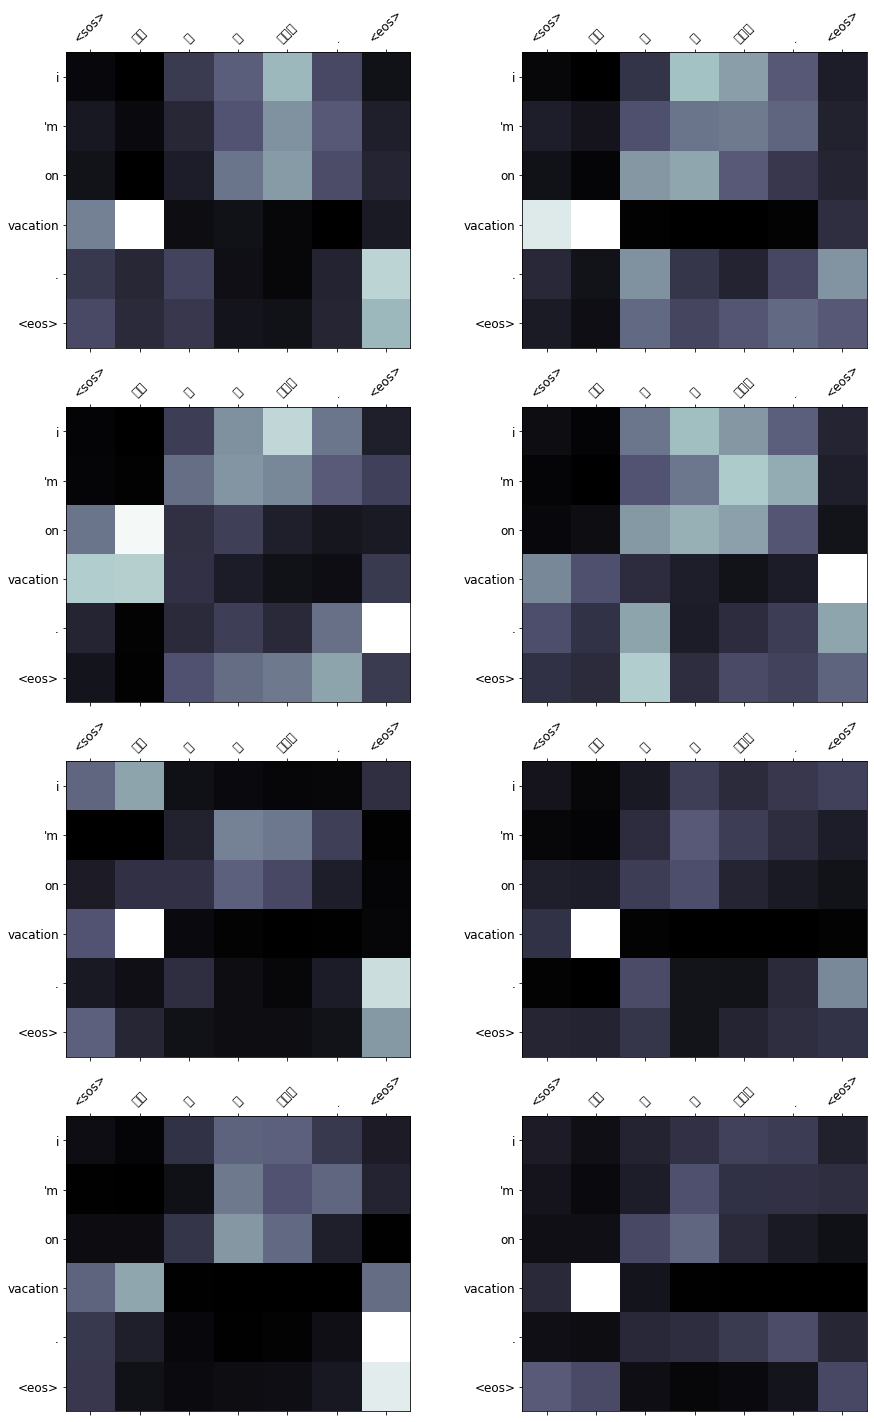

In [35]:
display_attention(src, translation, attention)

## Bleu Score

In [42]:
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['src']
        trg = vars(datum)['trg']
        
        pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)

# 5. Romanize

In [31]:
from korean_romanizer.romanizer import Romanizer

def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):
    
    model.eval()
        
    if isinstance(sentence, str):
        tokens = [token for token in sentence.split()]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    #trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]

    ## Romanize Start
    trg_tokens =[]
    ti = 0
    for i in trg_indexes:
      if trg_field.vocab.itos[i] != '<unk>':
        trg_tokens.append(trg_field.vocab.itos[i])
      else:
        try:
          trg_tokens.append(Romanizer(tokens[ti]).romanize())
        except:
          continue
      ti+=1
    ## Romanize End
    
    return trg_tokens[1:], attention

# 6. Reverse Order

In [12]:
def tokenize_ko(text):
    return [tok for tok in text.split()][::-1]

def tokenize_en(text):
    return [tok for tok in text.split()]